# Model JST Plant Climate Chamber

### Jaringan Saraf Tiruan untuk Plant Climate Chamber

In [1]:
# Mengimpor pustaka yang dibutuhkan.

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('Data/dataAll.xlsx')

In [3]:
# Memisahkan data input dan data target.

# Data Input
X = data[['Heater','AC','DrybulbT','Radiation']]

# Data Target
target = data[['AirT','RH','No','Variation','Month','Time']]

In [4]:
# Memisahkan data pelatihan (training), data validasi (validation), dan data pengujian (testing).

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan 20% menjadi data tes
X_temp, X_test, y_temp, y_test = train_test_split(X, target, test_size=0.15, shuffle=True, random_state=15)

# Memisahkan 20% menjadi data validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=(15/85), shuffle=True, random_state=2019)

In [5]:
# Menghapus data temporary
del X_temp, y_temp

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(target)*100,2),
                                                       round(len(y_val)/len(target)*100,2),
                                                       round(len(y_test)/len(target)*100,2)))

train: 70.0% | validation: 15.0% | test 15.0%


In [6]:
# banyak data
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(16799, 4) (3601, 4) (3600, 4) (16799, 6) (3601, 6) (3600, 6)


## Model Tuning menggunakan Multi-Layer Perceptron Regressor

In [7]:
# DESIGN PROCESS
print('DESIGN PROCESS')
print('-'*76)

# Pembuatan model
model_mlp = MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(33,99), solver='adam', 
                         alpha=0.001, max_iter = 5000)
print(model_mlp.get_params())

DESIGN PROCESS
----------------------------------------------------------------------------
{'activation': 'relu', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (33, 99), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 5000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [8]:
# TRAINING PROCESS
print('TRAINING PROCESS')
print('-'*76)

# Melakukan pelatihan (training) menggunakan 'fit'
model_mlp.fit(X_train, y_train[['AirT','RH']])

# Prediksi model
y_pred = model_mlp.predict(X_train)
y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])

# Menghitung nilai RMSE dan R^2
rmse_AirT = round(mean_squared_error(y_train.AirT, y_pred.AirT)**0.5,2)
R2_AirT = round(r2_score(y_train.AirT, y_pred.AirT)*100,2)

rmse_RH = round(mean_squared_error(y_train.RH, y_pred.RH)**0.5,2)
R2_RH = round(r2_score(y_train.RH, y_pred.RH)*100,2)


# print errors as report
print('AirT : RMSE = {} R^2  = {}%'.format(rmse_AirT,R2_AirT))
print('RH   : RMSE = {} R^2  = {}%'.format(rmse_RH,R2_RH))
print()

TRAINING PROCESS
----------------------------------------------------------------------------
AirT : RMSE = 0.96 R^2  = 85.32%
RH   : RMSE = 8.79 R^2  = 30.58%



In [9]:
# VALIDATION PROCESS
print('VALIDATION PROCESS')
print('-'*76)

# Prediksi model
y_pred = model_mlp.predict(X_val)
y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])

# Menghitung nilai RMSE dan R^2
rmse_AirT = round(mean_squared_error(y_val.AirT, y_pred.AirT)**0.5,2)
R2_AirT = round(r2_score(y_val.AirT, y_pred.AirT)*100,2)

rmse_RH = round(mean_squared_error(y_val.RH, y_pred.RH)**0.5,2)
R2_RH = round(r2_score(y_val.RH, y_pred.RH)*100,2)


# print errors as report
print('AirT : RMSE = {} R^2  = {}%'.format(rmse_AirT,R2_AirT))
print('RH   : RMSE = {} R^2  = {}% '.format(rmse_RH,R2_RH))
print()

VALIDATION PROCESS
----------------------------------------------------------------------------
AirT : RMSE = 0.96 R^2  = 84.99%
RH   : RMSE = 8.78 R^2  = 30.29% 



In [10]:
# TESTING PROCESS
print('TESTING PROCESS')
print('-'*76)

# Prediksi model
y_pred = model_mlp.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])

# Menghitung nilai RMSE dan R^2
rmse_AirT = round(mean_squared_error(y_test.AirT, y_pred.AirT)**0.5,2)
rmse_RH = round(mean_squared_error(y_test.RH, y_pred.RH)**0.5,2)
R_AirT = round(r2_score(y_test.AirT, y_pred.AirT)**0.5*100,2)
R_RH = round(r2_score(y_test.RH, y_pred.RH)**0.5*100,2)

print('Testing')
print('AirT : RMSE = {} | R = {}%'.format(rmse_AirT,R_AirT))
print('RH   : RMSE = {} | R = {}%'.format(rmse_RH,R_RH))

TESTING PROCESS
----------------------------------------------------------------------------
Testing
AirT : RMSE = 0.96 | R = 92.09%
RH   : RMSE = 8.86 | R = 53.99%


## Visualisasi

In [11]:
# Menambahkan fitur No Variation Month dan Time pada hasil prediksi
y_pred.index = y_test.index
y_pred[['No']] = y_test[['No']]
y_pred[['Variation']] = y_test[['Variation']]
y_pred[['Month']] = y_test[['Month']]
y_pred[['Time']] = y_test[['Time']]
y_pred

,AirT,RH,No,Variation,Month,Time
3257,18.716752,97.521292,3258,DT014,Jun,13:45:00
20006,25.175870,89.921079,20007,DT084,Des,08:39:00
2969,18.863629,98.699886,2970,DT013,Mar,08:57:00
20123,25.276022,88.293006,20124,DT084,Des,20:21:00
2733,18.432671,102.952245,2734,DT012,Des,09:21:00
...,...,...,...,...,...,...
821,15.980077,100.517261,822,DT004,Des,10:15:00
21509,27.973904,71.494011,21510,DT090,Jun,14:57:00
20551,27.161048,73.194509,20552,DT086,Jun,15:09:00
9002,24.505125,91.345741,9003,DT038,Jun,12:15:00


In [12]:
# Variabel untuk pembuatan grafik

Heater    = X_test['Heater']
AC        = X_test['AC']
DrybulbT  = X_test['DrybulbT']
Radiation = X_test['Radiation']
AirT      = y_test['AirT']
RH        = y_test['RH']

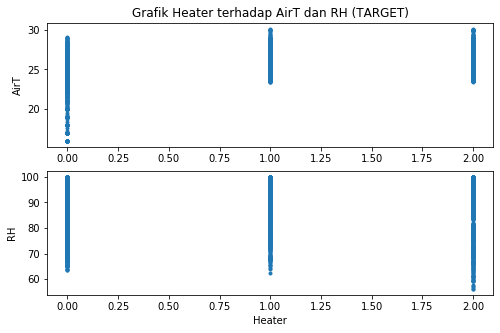

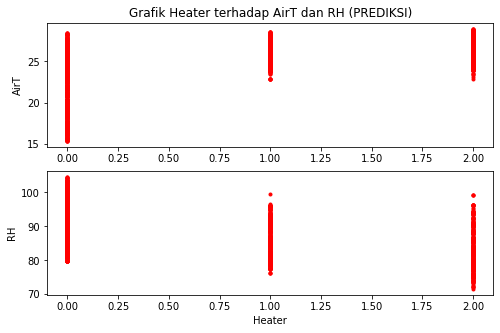

In [13]:
# plot a line, a perfit predict would all fall on this line
plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH (TARGET)')
plt.plot(Heater, AirT, '.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Heater, RH, '.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

plt.figure(figsize=(8,5))

plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH (PREDIKSI)')
plt.plot(Heater, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Heater, y_pred.RH, 'r.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

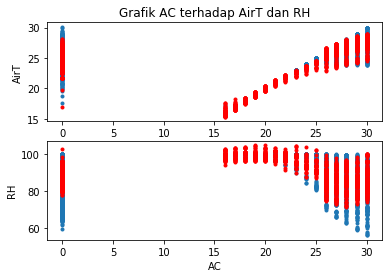

In [14]:
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap AirT dan RH')
plt.plot(AC, AirT, '.')
plt.plot(AC, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(AC, RH, '.')
plt.plot(AC, y_pred.RH, 'r.')
plt.xlabel('AC')
plt.ylabel('RH')

plt.show()

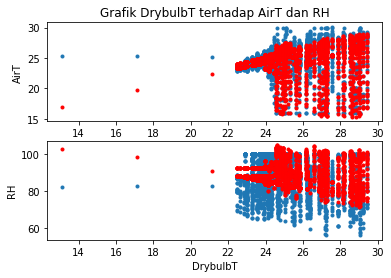

In [15]:
plt.subplot(2, 1, 1)
plt.title('Grafik DrybulbT terhadap AirT dan RH')
plt.plot(DrybulbT, AirT, '.')
plt.plot(DrybulbT, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(DrybulbT, RH, '.')
plt.plot(DrybulbT, y_pred.RH, 'r.')
plt.xlabel('DrybulbT')
plt.ylabel('RH')

plt.show()

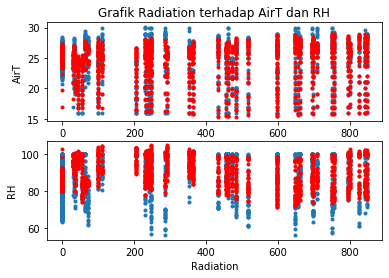

In [16]:
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap AirT dan RH')
plt.plot(Radiation, AirT, '.')
plt.plot(Radiation, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Radiation, RH, '.')
plt.plot(Radiation, y_pred.RH, 'r.')
plt.xlabel('Radiation')
plt.ylabel('RH')

plt.show()

## Visualisation in Time variance

Variasi: DT014


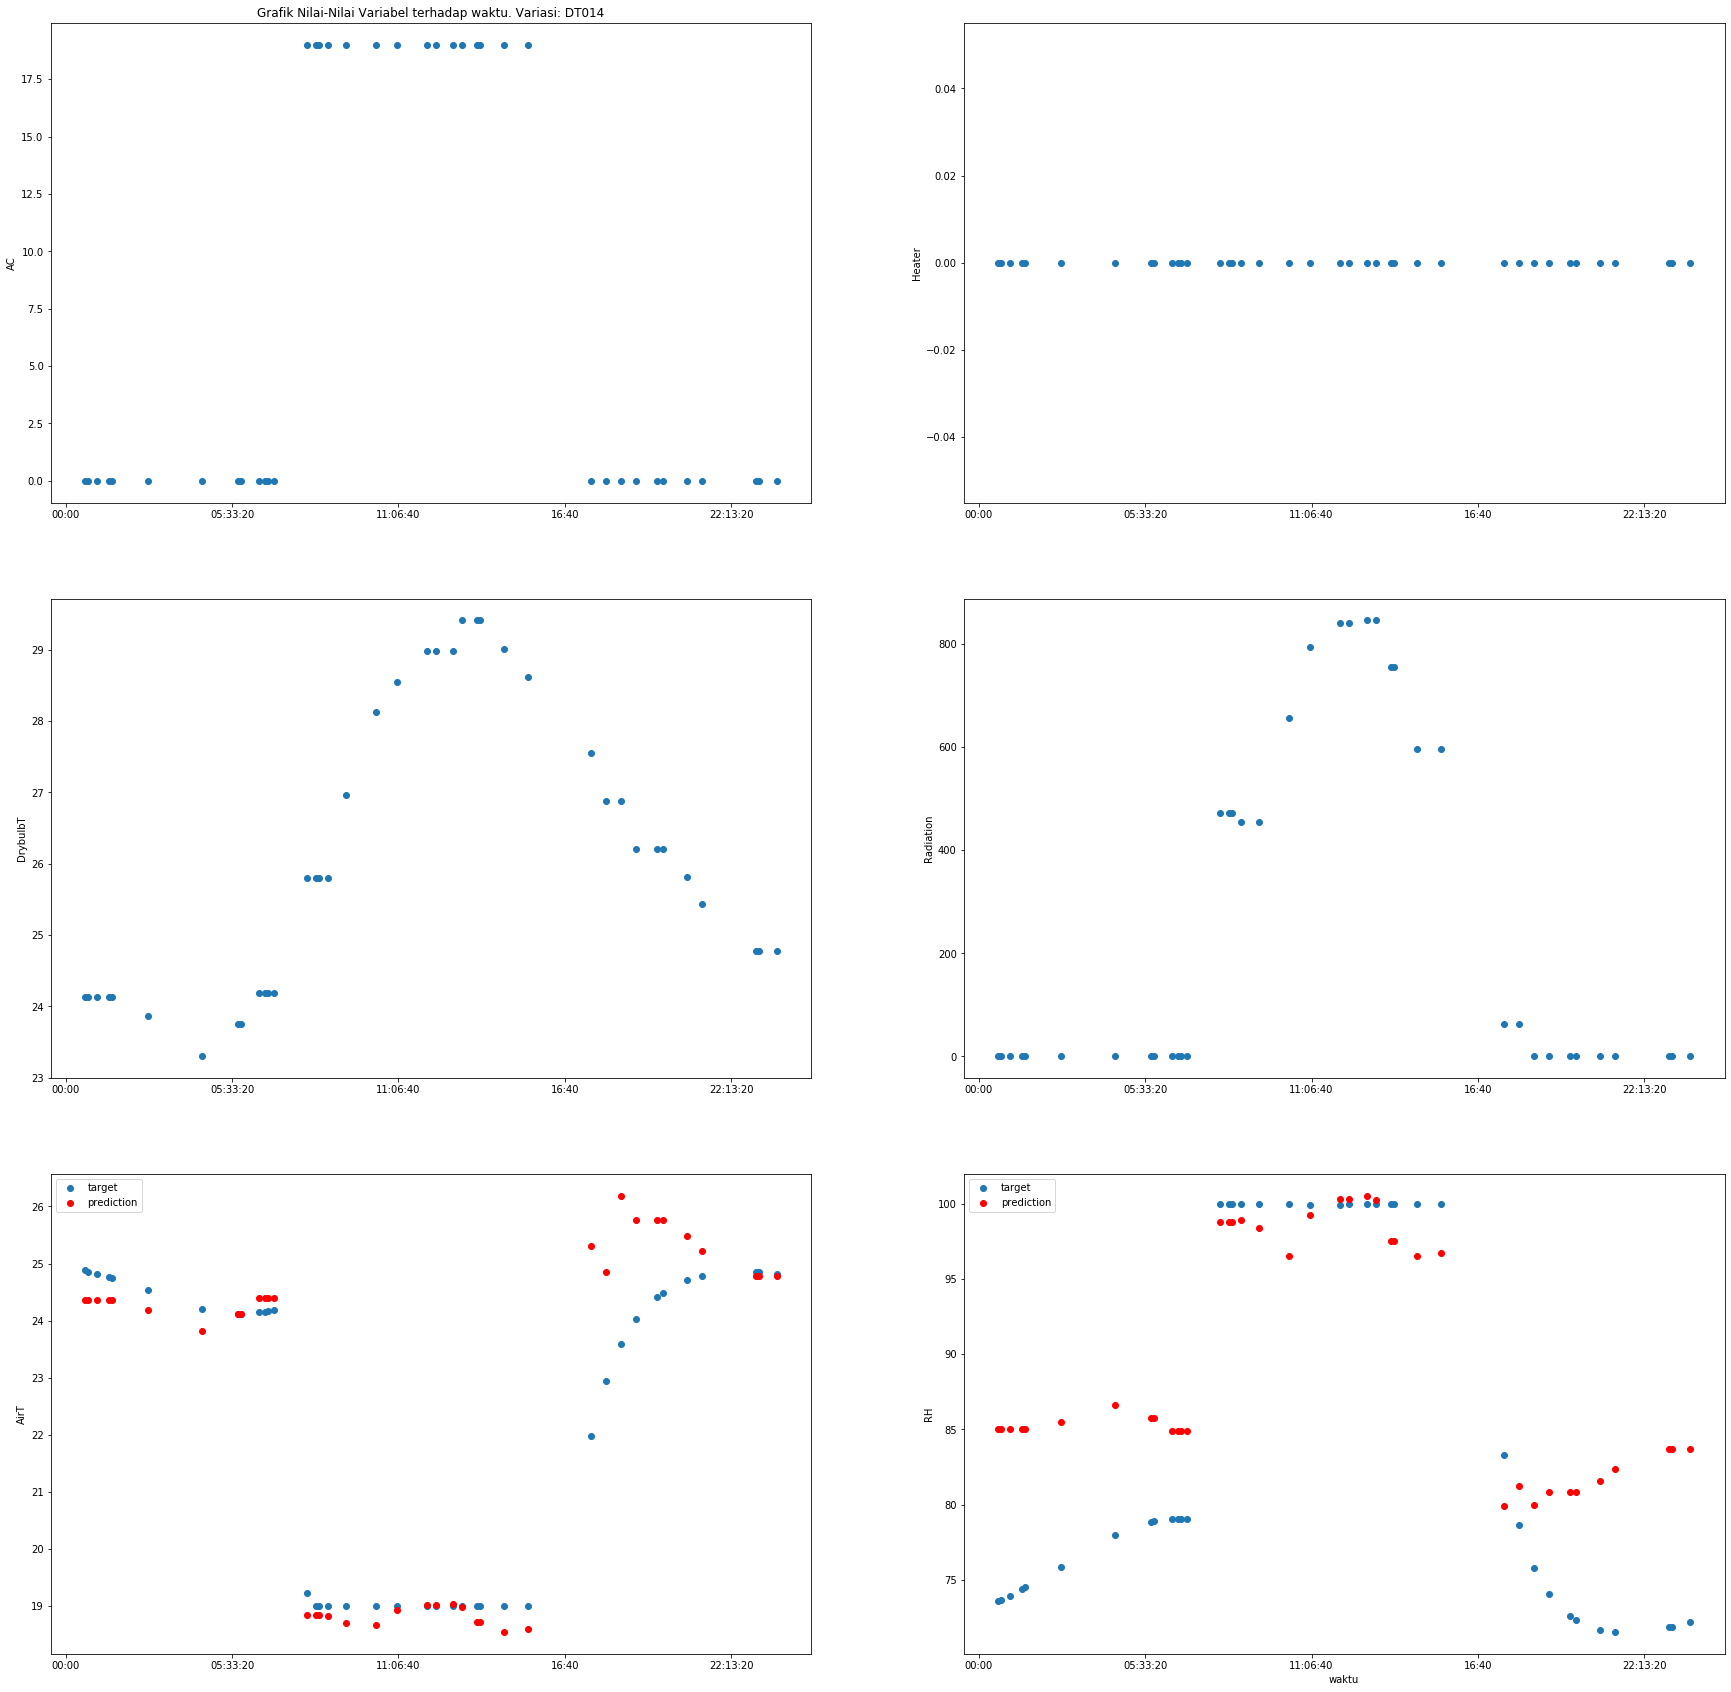

______________________________________________________________________________________________________________

Variasi: DT084


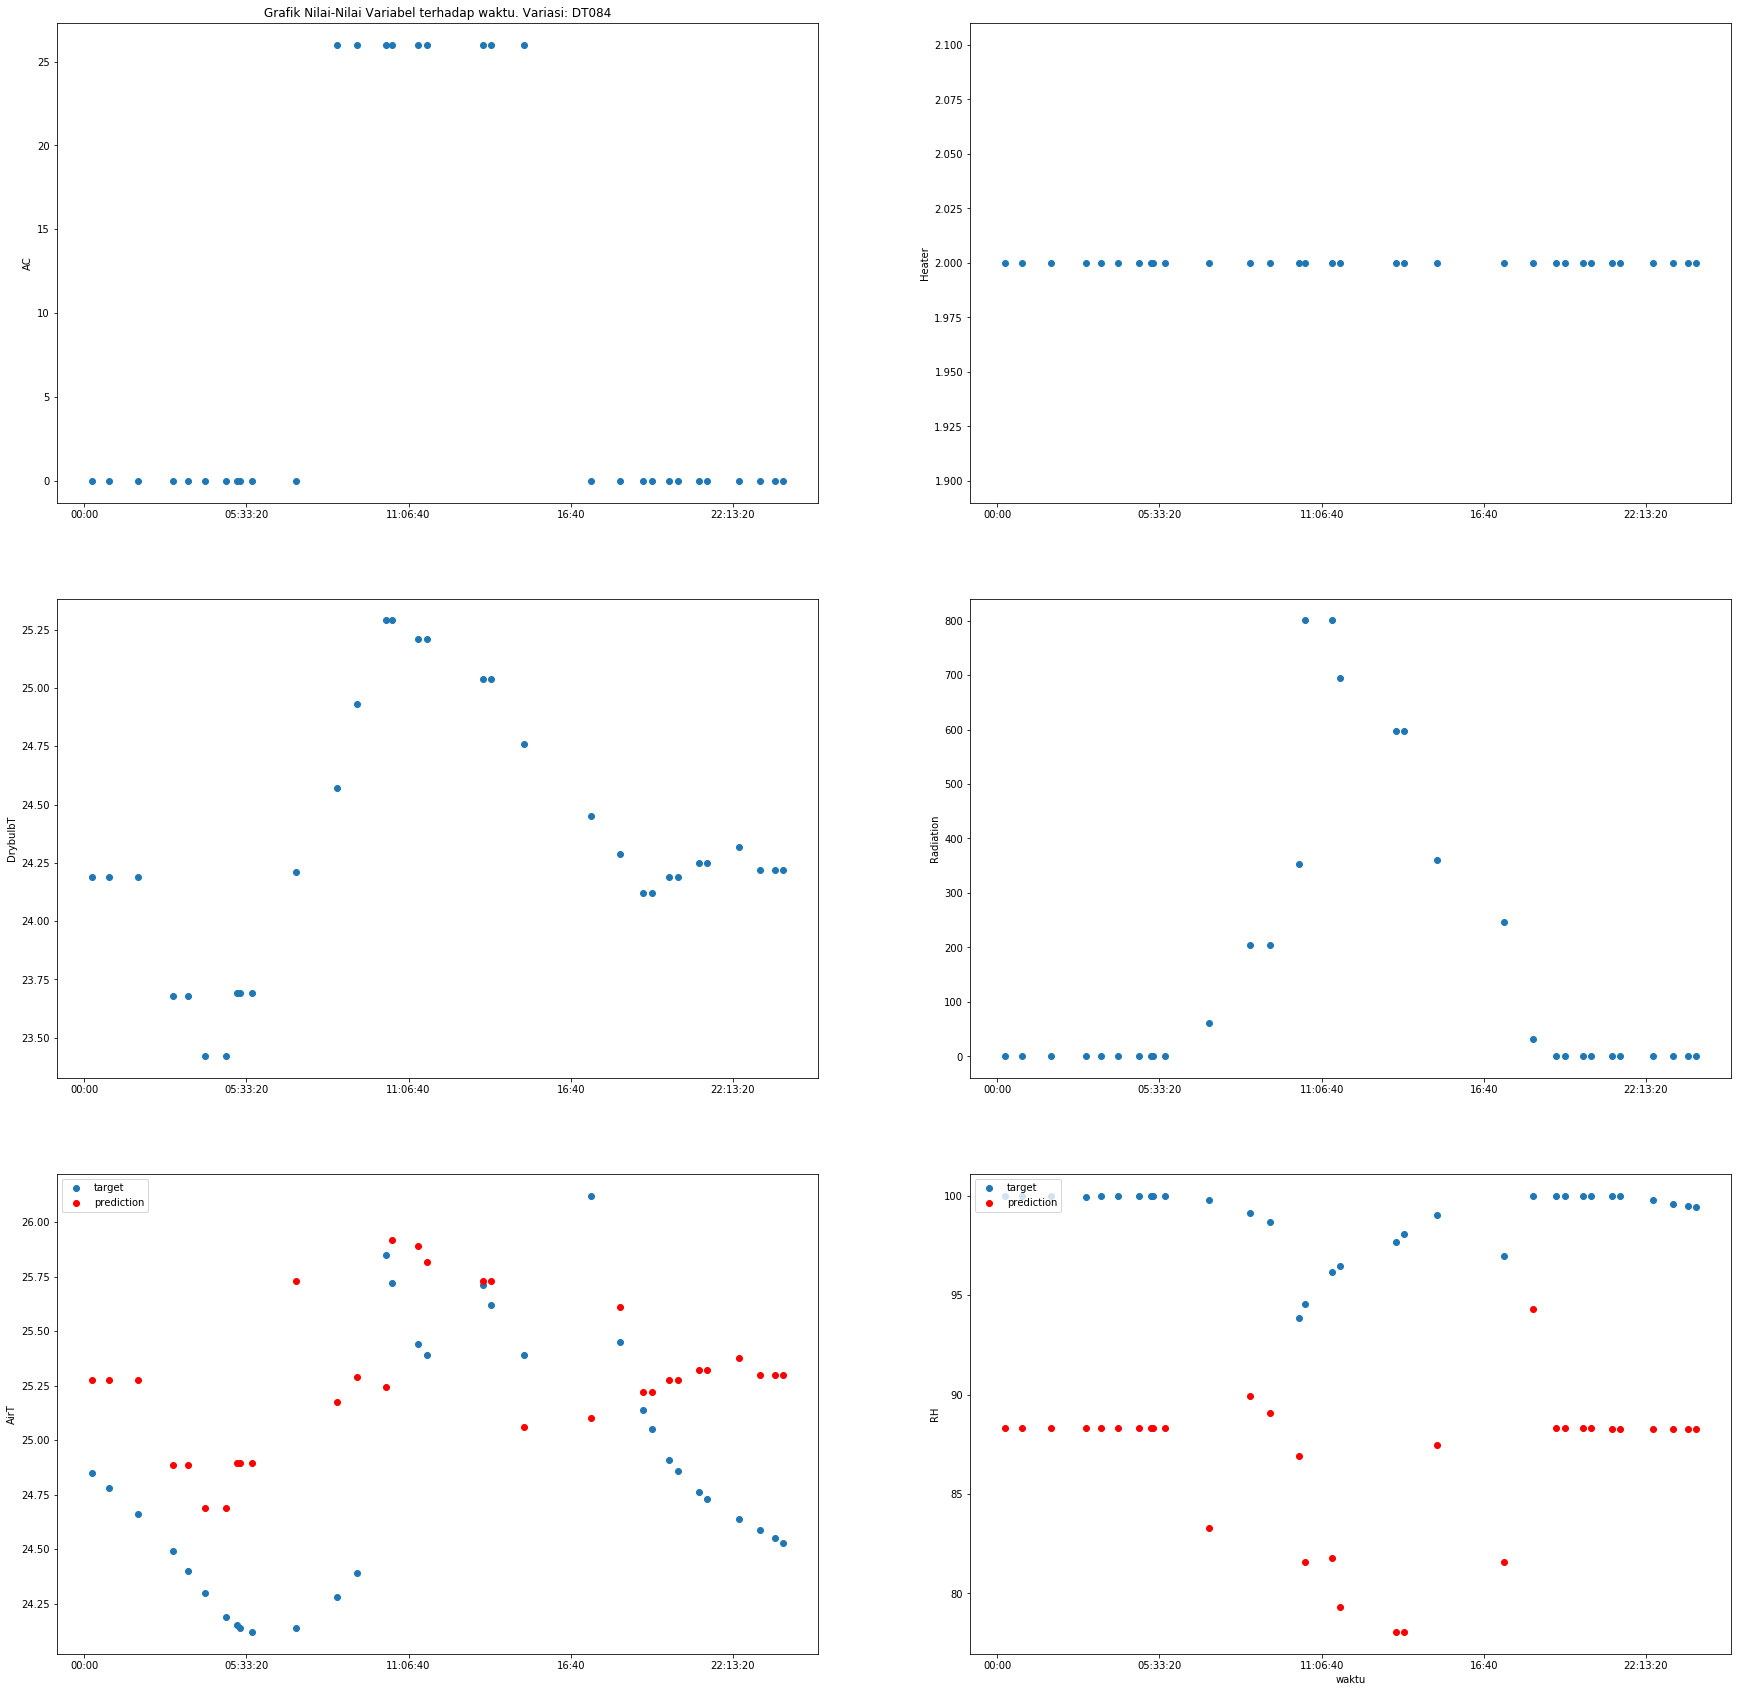

______________________________________________________________________________________________________________

Variasi: DT013


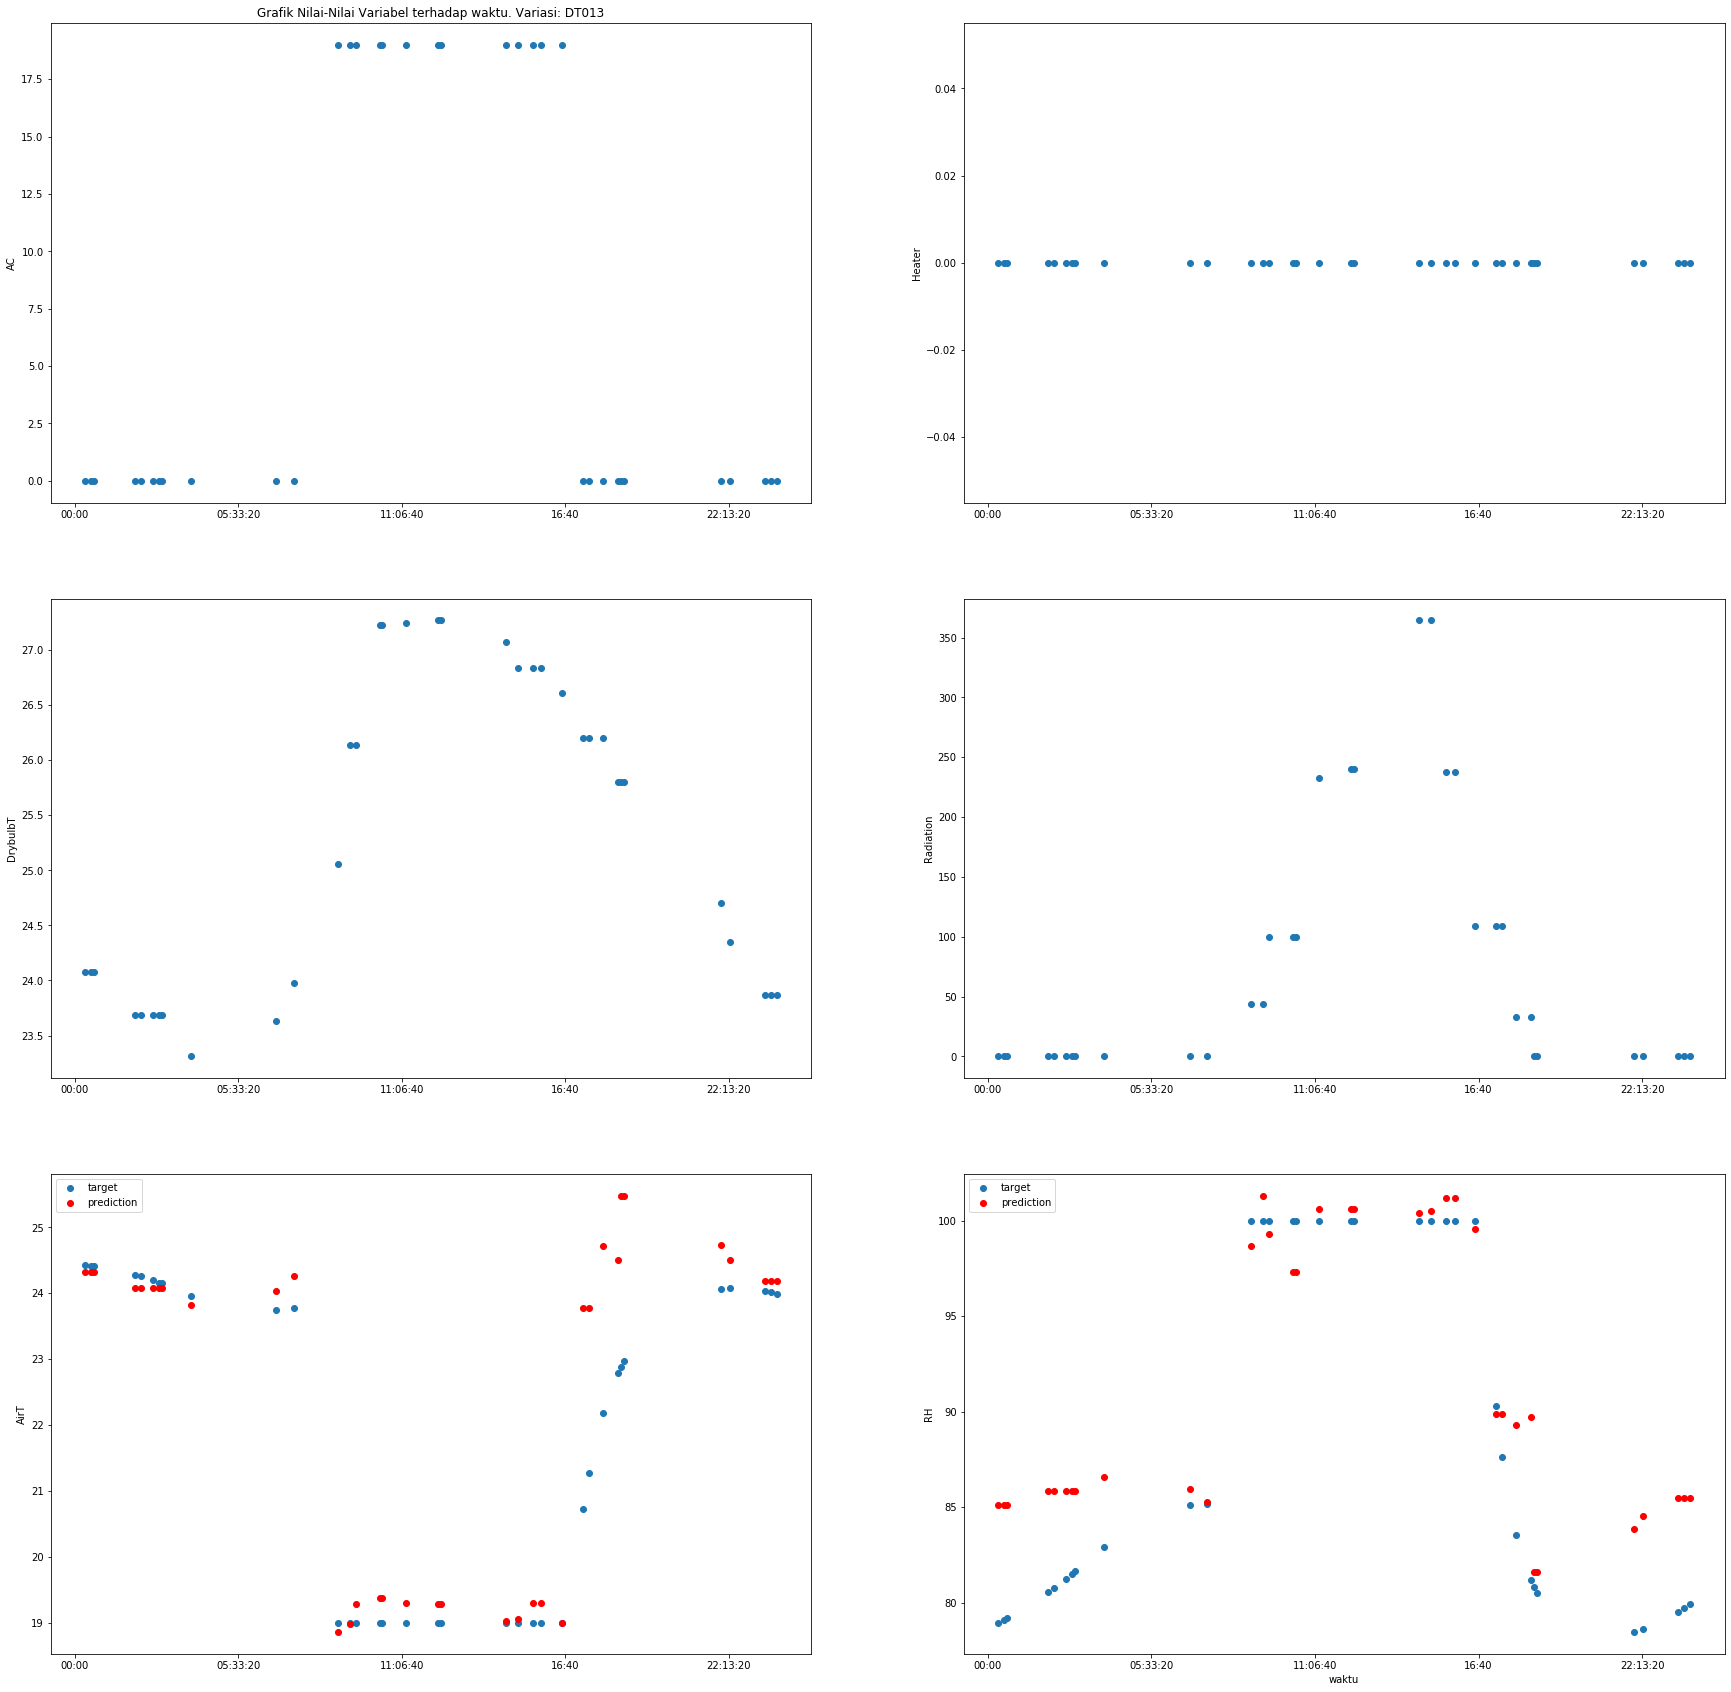

______________________________________________________________________________________________________________



In [17]:
i = 0
for v in y_test.Variation.unique():
    print('Variasi:', v)
    
    x1  = y_test.loc[y_test['Variation']==v].Time
    
    y1  = X_test.loc[y_test['Variation']==v].AC
    y2  = X_test.loc[y_test['Variation']==v].Heater
    y3  = X_test.loc[y_test['Variation']==v].DrybulbT
    y4  = X_test.loc[y_test['Variation']==v].Radiation
    y5a = y_test.loc[y_test['Variation']==v].AirT
    y5b = y_pred.loc[y_pred['Variation']==v].AirT
    y6a = y_test.loc[y_test['Variation']==v].RH
    y6b = y_pred.loc[y_pred['Variation']==v].RH
    
    plt.subplots(figsize=(30,30))
    
    plt.subplot(3,2,1)
    plt.title('Grafik Nilai-Nilai Variabel terhadap waktu. Variasi: ' + str(v))
    plt.plot(x1, y1, 'o')
    plt.xlabel(None)
    plt.ylabel('AC')
    
    plt.subplot(3,2,2)
    plt.plot(x1, y2, 'o')
    plt.xlabel(None)
    plt.ylabel('Heater')
    
    plt.subplot(3,2,3)
    plt.plot(x1, y3, 'o')
    plt.xlabel(None)
    plt.ylabel('DrybulbT')
    
    plt.subplot(3,2,4)
    plt.plot(x1, y4, 'o')
    plt.xlabel(None)
    plt.ylabel('Radiation')
    
    plt.subplot(3,2,5)
    plt.plot(x1, y5a, 'o', label='target')
    plt.plot(x1, y5b, 'ro', label='prediction')
    plt.xlabel(None)
    plt.ylabel('AirT')
    plt.legend(loc = 'upper left')
    
    plt.subplot(3,2,6)
    plt.plot(x1, y6a, 'o', label='target')
    plt.plot(x1, y6b, 'ro', label='prediction')
    plt.xlabel('waktu')
    plt.ylabel('RH')
    plt.legend(loc = 'upper left')
    
    plt.show()
    
    print('_'*110)
    print()
    
    i+=1
    if i == 3:
        break